# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [48]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [49]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The airplanes and the lounge...
1,✅ Trip Verified | One of the worst experiences...
2,✅ Trip Verified | Cancelled our flight last-m...
3,"✅ Trip Verified | I had a flight from Miami, F..."
4,✅ Trip Verified | We started our day with BA ...


In [50]:
df.to_csv("C:\\Users\\User\\OneDrive\\Desktop\\Data//BA_review.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [51]:
df

,reviews
0,✅ Trip Verified | The airplanes and the lounge...
1,✅ Trip Verified | One of the worst experiences...
2,✅ Trip Verified | Cancelled our flight last-m...
3,"✅ Trip Verified | I had a flight from Miami, F..."
4,✅ Trip Verified | We started our day with BA ...
...,...
995,✅ Trip Verified | We have been loyal customer...
996,✅ Trip Verified | Gatwick to Las Vegas. Board...
997,Not Verified | Nassau to London. Premium Econ...
998,✅ Trip Verified | Phoenix to Accra via London...


In [52]:
print("Removing the parts before the column in the reviews section")

Removing the parts before the column in the reviews section


In [53]:
df.reviews = df.reviews.str.split('|',expand=True)[1]
df

,reviews
0,"The airplanes and the lounges are worn out, o..."
1,One of the worst experiences on the worst air...
2,Cancelled our flight last-minute then moved ...
3,"I had a flight from Miami, Florida to Dublin,..."
4,We started our day with BA in Prague. The fl...
...,...
995,We have been loyal customers with British Ai...
996,Gatwick to Las Vegas. Boarding by group numb...
997,Nassau to London. Premium Economy on BA is a...
998,Phoenix to Accra via London. I had a great C...


# Data Preprocessing

In [54]:
##Cleaning the Text

In [55]:
import re
# re is a function that cleans the text
def clean(text):
    #This removes all special characters leaving only alphabets
    text = re.sub('[^A-Za-z]+','',str(text))
    return text
#cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,"The airplanes and the lounges are worn out, o...",Theairplanesandtheloungesarewornoutoldandbroke...
1,One of the worst experiences on the worst air...,OneoftheworstexperiencesontheworstairlineThefl...
2,Cancelled our flight last-minute then moved ...,Cancelledourflightlastminutethenmovedusontoafl...
3,"I had a flight from Miami, Florida to Dublin,...",IhadaflightfromMiamiFloridatoDublinIrelandviaL...
4,We started our day with BA in Prague. The fl...,WestartedourdaywithBAinPragueTheflightactually...


In [56]:
#Obtaining stem words

In [57]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [58]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB,'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
            return newlist
        
        print(tag[0])
        print(pos_dict.get(tag[0]))
        
df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,"The airplanes and the lounges are worn out, o...",Theairplanesandtheloungesarewornoutoldandbroke...,[(Theairplanesandtheloungesarewornoutoldandbro...
1,One of the worst experiences on the worst air...,OneoftheworstexperiencesontheworstairlineThefl...,[(OneoftheworstexperiencesontheworstairlineThe...
2,Cancelled our flight last-minute then moved ...,Cancelledourflightlastminutethenmovedusontoafl...,[(Cancelledourflightlastminutethenmovedusontoa...
3,"I had a flight from Miami, Florida to Dublin,...",IhadaflightfromMiamiFloridatoDublinIrelandviaL...,[(IhadaflightfromMiamiFloridatoDublinIrelandvi...
4,We started our day with BA in Prague. The fl...,WestartedourdaywithBAinPragueTheflightactually...,[(WestartedourdaywithBAinPragueTheflightactual...


In [59]:
#Obtaining stem words_ Lemmatisation

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
                lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
                lemma_rew = lemma_rew + " " +lemma
        return lemma_rew
df['Lemma'] = df ['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"The airplanes and the lounges are worn out, o...",Theairplanesandtheloungesarewornoutoldandbroke...,[(Theairplanesandtheloungesarewornoutoldandbro...,Theairplanesandtheloungesarewornoutoldandbro...
1,One of the worst experiences on the worst air...,OneoftheworstexperiencesontheworstairlineThefl...,[(OneoftheworstexperiencesontheworstairlineThe...,OneoftheworstexperiencesontheworstairlineThe...
2,Cancelled our flight last-minute then moved ...,Cancelledourflightlastminutethenmovedusontoafl...,[(Cancelledourflightlastminutethenmovedusontoa...,Cancelledourflightlastminutethenmovedusontoa...
3,"I had a flight from Miami, Florida to Dublin,...",IhadaflightfromMiamiFloridatoDublinIrelandviaL...,[(IhadaflightfromMiamiFloridatoDublinIrelandvi...,IhadaflightfromMiamiFloridatoDublinIrelandvi...
4,We started our day with BA in Prague. The fl...,WestartedourdaywithBAinPragueTheflightactually...,[(WestartedourdaywithBAinPragueTheflightactual...,WestartedourdaywithBAinPragueTheflightactual...


In [60]:
df[['reviews', 'Lemma']]

,reviews,Lemma
0,"The airplanes and the lounges are worn out, o...",Theairplanesandtheloungesarewornoutoldandbro...
1,One of the worst experiences on the worst air...,OneoftheworstexperiencesontheworstairlineThe...
2,Cancelled our flight last-minute then moved ...,Cancelledourflightlastminutethenmovedusontoa...
3,"I had a flight from Miami, Florida to Dublin,...",IhadaflightfromMiamiFloridatoDublinIrelandvi...
4,We started our day with BA in Prague. The fl...,WestartedourdaywithBAinPragueTheflightactual...
...,...,...
995,We have been loyal customers with British Ai...,WehavebeenloyalcustomerswithBritishAirwayssi...
996,Gatwick to Las Vegas. Boarding by group numb...,GatwicktoLasVegasBoardingbygroupnumberseemed...
997,Nassau to London. Premium Economy on BA is a...,NassautoLondonPremiumEconomyonBAisajokeHighl...
998,Phoenix to Accra via London. I had a great C...,PhoenixtoAccraviaLondonIhadagreatCustomerser...


In [61]:
#Sentiment Analysis Using VADER
!pip install vaderSentiment

In [62]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"The airplanes and the lounges are worn out, o...",Theairplanesandtheloungesarewornoutoldandbroke...,[(Theairplanesandtheloungesarewornoutoldandbro...,Theairplanesandtheloungesarewornoutoldandbro...,0.0,Neutral
1,One of the worst experiences on the worst air...,OneoftheworstexperiencesontheworstairlineThefl...,[(OneoftheworstexperiencesontheworstairlineThe...,OneoftheworstexperiencesontheworstairlineThe...,0.0,Neutral
2,Cancelled our flight last-minute then moved ...,Cancelledourflightlastminutethenmovedusontoafl...,[(Cancelledourflightlastminutethenmovedusontoa...,Cancelledourflightlastminutethenmovedusontoa...,0.0,Neutral
3,"I had a flight from Miami, Florida to Dublin,...",IhadaflightfromMiamiFloridatoDublinIrelandviaL...,[(IhadaflightfromMiamiFloridatoDublinIrelandvi...,IhadaflightfromMiamiFloridatoDublinIrelandvi...,0.0,Neutral
4,We started our day with BA in Prague. The fl...,WestartedourdaywithBAinPragueTheflightactually...,[(WestartedourdaywithBAinPragueTheflightactual...,WestartedourdaywithBAinPragueTheflightactual...,0.0,Neutral


In [63]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Calculating vader sentiment
def vadersentimentanalysis(review):
    VS = analyzer.polarity_scores(review)
    return VS ['compound']
df ['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)
#function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df ['Analysis'] = df ['Sentiment'].apply(vader_analysis)
df.head(100)

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"The airplanes and the lounges are worn out, o...",Theairplanesandtheloungesarewornoutoldandbroke...,[(Theairplanesandtheloungesarewornoutoldandbro...,Theairplanesandtheloungesarewornoutoldandbro...,0.0,Neutral
1,One of the worst experiences on the worst air...,OneoftheworstexperiencesontheworstairlineThefl...,[(OneoftheworstexperiencesontheworstairlineThe...,OneoftheworstexperiencesontheworstairlineThe...,0.0,Neutral
2,Cancelled our flight last-minute then moved ...,Cancelledourflightlastminutethenmovedusontoafl...,[(Cancelledourflightlastminutethenmovedusontoa...,Cancelledourflightlastminutethenmovedusontoa...,0.0,Neutral
3,"I had a flight from Miami, Florida to Dublin,...",IhadaflightfromMiamiFloridatoDublinIrelandviaL...,[(IhadaflightfromMiamiFloridatoDublinIrelandvi...,IhadaflightfromMiamiFloridatoDublinIrelandvi...,0.0,Neutral
4,We started our day with BA in Prague. The fl...,WestartedourdaywithBAinPragueTheflightactually...,[(WestartedourdaywithBAinPragueTheflightactual...,WestartedourdaywithBAinPragueTheflightactual...,0.0,Neutral
...,...,...,...,...,...,...
95,"May 3, flew from Seattle to Heathrow then to...",MayflewfromSeattletoHeathrowthentoEdinburghBAl...,[(MayflewfromSeattletoHeathrowthentoEdinburghB...,MayflewfromSeattletoHeathrowthentoEdinburghB...,0.0,Neutral
96,I went through three flights to reach my dest...,IwentthroughthreeflightstoreachmydestinationAl...,[(Iwentthroughthreeflightstoreachmydestination...,Iwentthroughthreeflightstoreachmydestination...,0.0,Neutral
97,An excellent flight in Club World on British ...,AnexcellentflightinClubWorldonBritishAirwaysTh...,[(AnexcellentflightinClubWorldonBritishAirways...,AnexcellentflightinClubWorldonBritishAirways...,0.0,Neutral
98,The flight schedule was delayed for one hour....,TheflightschedulewasdelayedforonehourAfterboar...,[(TheflightschedulewasdelayedforonehourAfterbo...,TheflightschedulewasdelayedforonehourAfterbo...,0.0,Neutral


In [64]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Neutral    1000
Name: Analysis, dtype: int64

ValueError: 'explode' must be of length 'x'

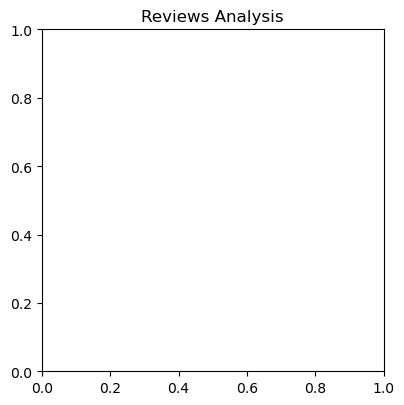

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 1), autopct='%1.1f%%', shadow=False)

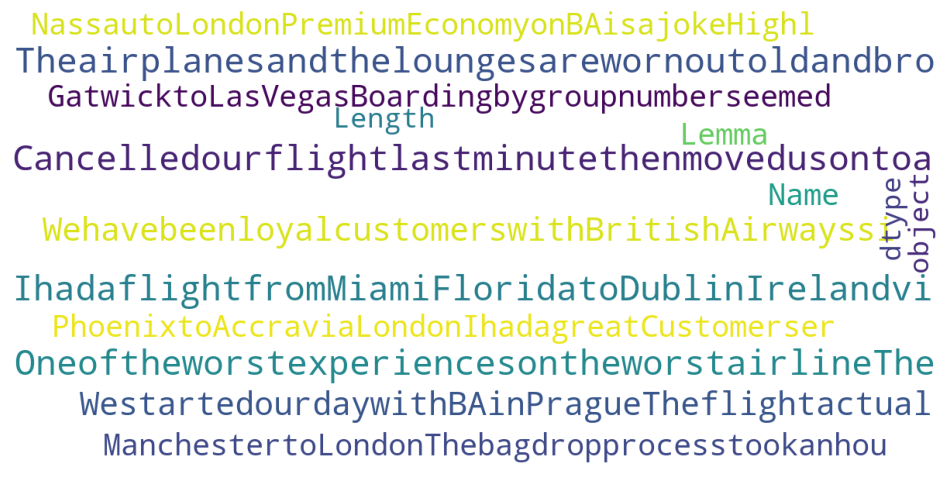

In [68]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)